In [1]:
%pip install numpy matplotlib scikit-learn gensim

Note: you may need to restart the kernel to use updated packages.


### Visualizing Word Embeddings using PCA and t-SNE
- Model from https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM
- Reference: https://github.com/practical-nlp/practical-nlp-code/blob/835096fb83b396d1fac70fb313c294b409b02d7a/Ch3/05_Pre_Trained_Word_Embeddings.ipynb

In [2]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from gensim.models import KeyedVectors

# Load pre-trained word embeddings
# For this example, we're assuming Word2Vec embeddings, but adjust accordingly for others.
model = KeyedVectors.load_word2vec_format(r'/media/bigboy/GoogleNews-vectors-negative300.bin', binary=True)

In [3]:
model.most_similar('beautiful')

[('gorgeous', 0.8353005051612854),
 ('lovely', 0.8106935620307922),
 ('stunningly_beautiful', 0.7329413890838623),
 ('breathtakingly_beautiful', 0.7231340408325195),
 ('wonderful', 0.6854085922241211),
 ('fabulous', 0.670006513595581),
 ('loveliest', 0.6612577438354492),
 ('prettiest', 0.6595001220703125),
 ('beatiful', 0.6593325138092041),
 ('magnificent', 0.6591402888298035)]

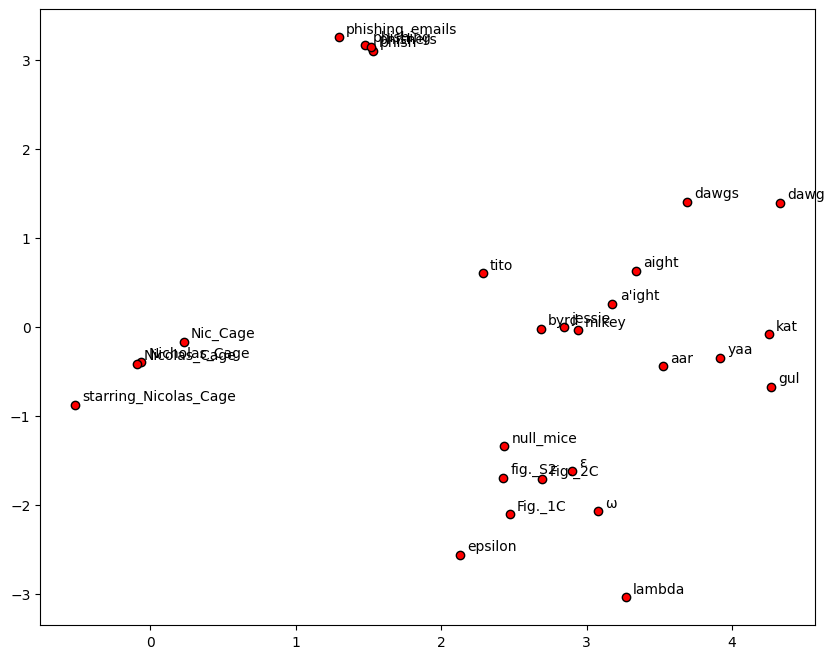

In [34]:
def similiarTupleToArr(original,similiar):
  return [original] + [word for word, _ in similiar]

def plot_words(words_to_visualize):
  words = []
  for vword in words_to_visualize:
    if model.key_to_index[vword]:
      similar = model.most_similar(vword, topn=3)
      new_words = similiarTupleToArr(vword,similar)
      words.extend(new_words)
  # Extracting the vectors for the words
  word_vectors = np.array([model[word] for word in words])
  plot_vec(word_vectors, words)

def plot_vec(word_vectors, words):
  # Using t-SNE to reduce dimensionality for visualization
  perplexity = max(1, len(words) / 2)
  tsne = TSNE(n_components=2, random_state=0, perplexity=perplexity)
  word_vectors_2d = tsne.fit_transform(word_vectors)

  # Plotting the words in 2D space
  plt.figure(figsize=(10, 8))
  plt.scatter(word_vectors_2d[:, 0], word_vectors_2d[:, 1], edgecolors='k', c='r')
  for word, (x, y) in zip(words, word_vectors_2d):
    plt.text(x + 0.05, y + 0.05, word)

  plt.show()

words_to_visualize = ['dawg', 'kat', 'byrd', 'phish', 'Nicholas_Cage', 'lambda', 'epsilon']
plot_words(words_to_visualize)

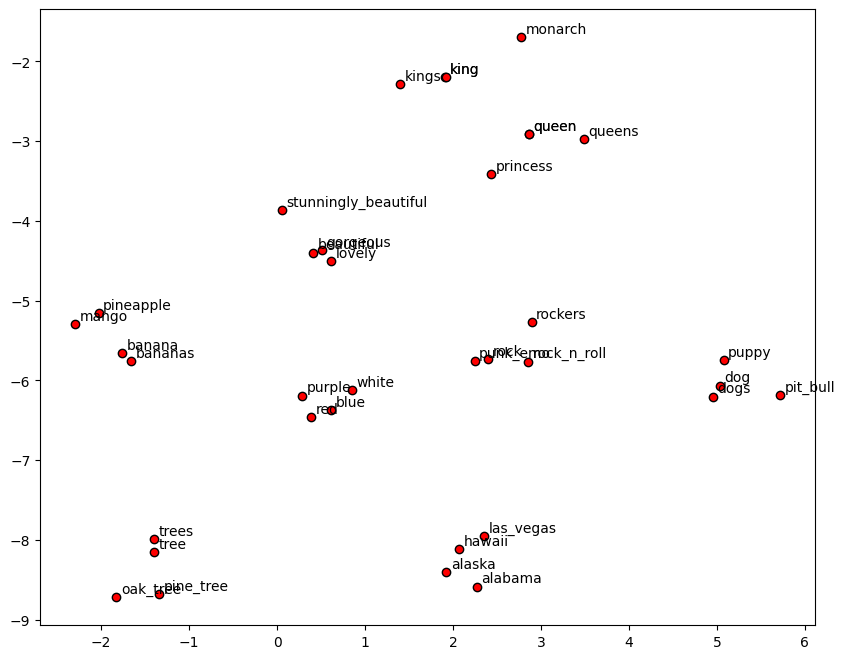

In [35]:
words_to_visualize = ['king', 'queen', 'beautiful', 'dog', 'banana', 'rock', 'tree', 'blue', 'hawaii']
plot_words(words_to_visualize)

/home/lettuce/miniconda3/envs/llm/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 57453 (\ue06d) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


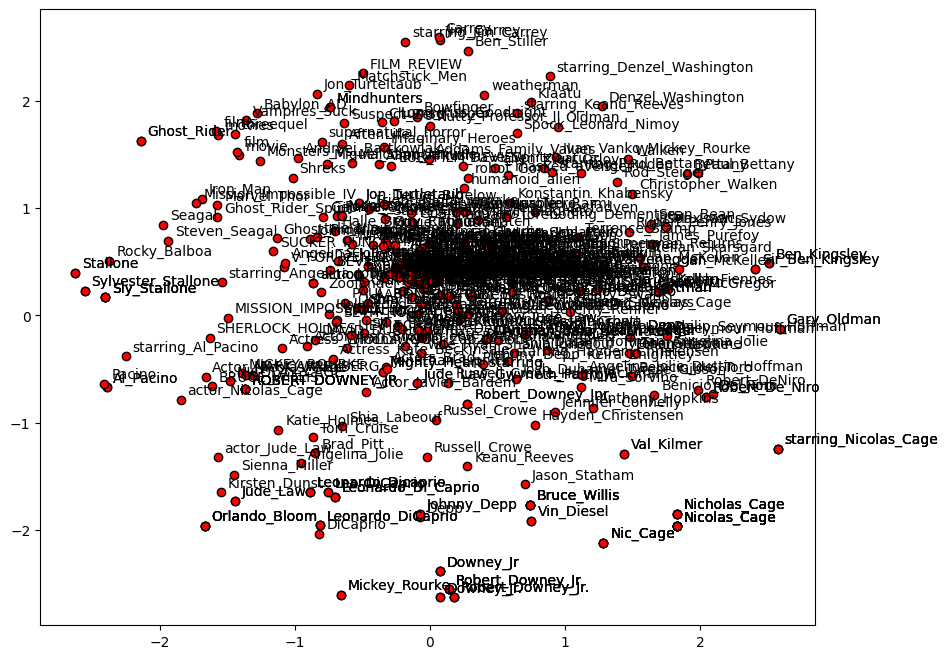

In [37]:
# Nick Cage
Nick_OSphere = model.most_similar('Nicholas_Cage', topn=100)
words_to_visualize = similiarTupleToArr('Nicholas_Cage',Nick_OSphere)
plot_words(words_to_visualize)

<BarContainer object of 100 artists>

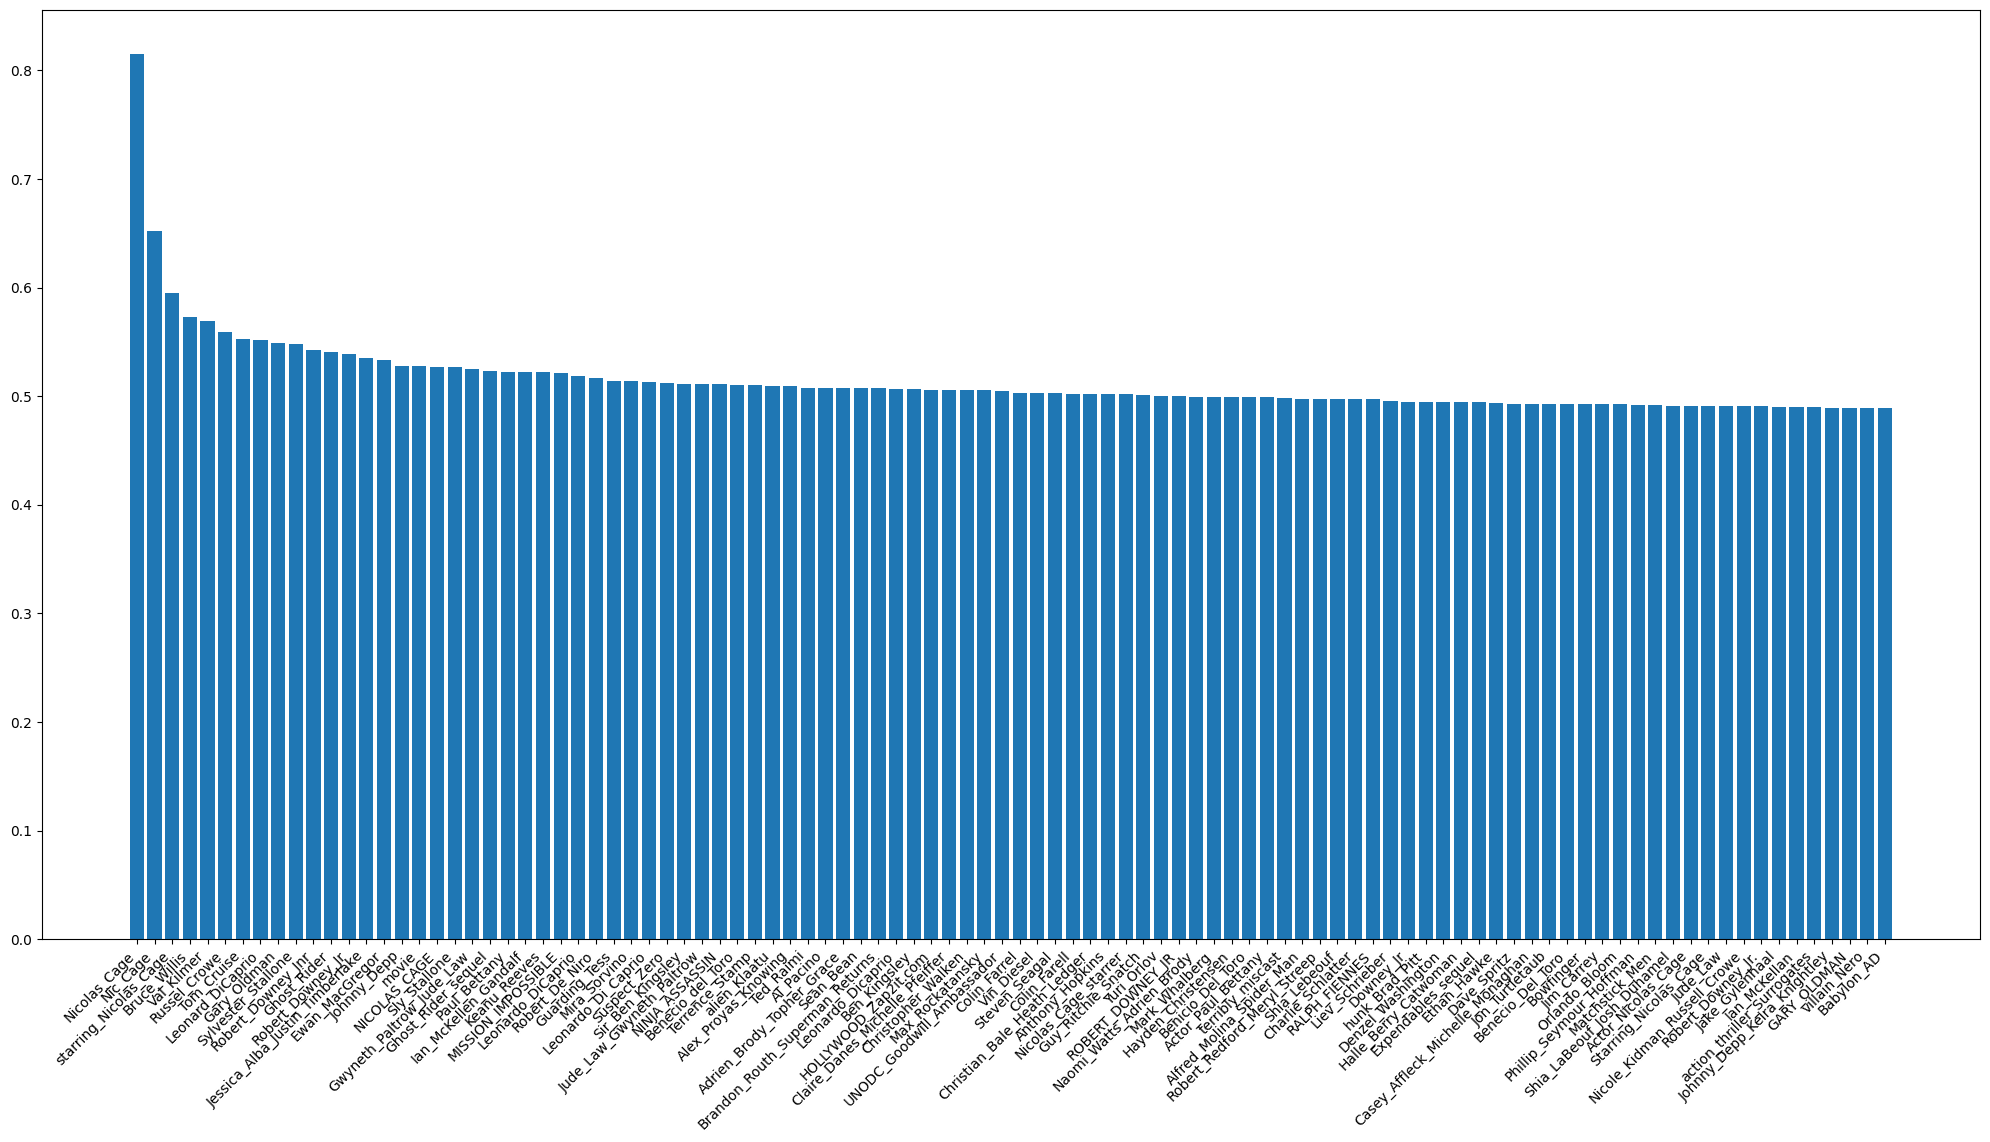

In [48]:
# display a bar chart of the most similar words
similar_words = Nick_OSphere#model.most_similar('beautiful', topn=10)
words = [word for word, _ in similar_words]
scores = [score for _, score in similar_words]
# increase spacing on labels for readability
plt.figure(figsize=(20, 10))
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.bar(words, scores)

In [24]:
# user input to test if words are in the model vocabulary
word = input('Enter a word: ')
if word in model.key_to_index:
  print(model.most_similar(word, topn=50))
  plot_words
else:
  print('Word not in vocabulary')

[('Nicolas_Cage', 0.814954936504364), ('Nic_Cage', 0.6520151495933533), ('starring_Nicolas_Cage', 0.5950876474380493), ('Bruce_Willis', 0.5731165409088135), ('Val_Kilmer', 0.5690739154815674), ('Russel_Crowe', 0.5591221451759338), ('Tom_Cruise', 0.5526227355003357), ('Leonard_DiCaprio', 0.552140474319458), ('Gary_Oldman', 0.549135148525238), ('Sylvester_Stallone', 0.5483039617538452), ('Robert_Downey_Jnr', 0.5427968502044678), ('Ghost_Rider', 0.5403972268104553), ('Robert_Downey_Jr', 0.5392301678657532), ('Jessica_Alba_Justin_Timberlake', 0.5349688529968262), ('Ewan_MacGregor', 0.5329623222351074), ('Johnny_Depp', 0.5279685854911804), ('movie', 0.5278732180595398), ('NICOLAS_CAGE', 0.5271010398864746), ('Sly_Stallone', 0.5266751050949097), ('Gwyneth_Paltrow_Jude_Law', 0.5254859328269958), ('Ghost_Rider_sequel', 0.5229962468147278), ('Paul_Bettany', 0.5225838422775269), ('Ian_McKellen_Gandalf', 0.5223975777626038), ('Keanu_Reeves', 0.5223866105079651), ('MISSION_IMPOSSIBLE', 0.521261096